In [1]:
import openmc
import openmc.mgxs as mgxs
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp_most_minimized_pf = openmc.StatePoint("./most_minimized_pf_gen5_corrected/statepoint.80.h5")

In [3]:
sp_most_minimized_ppf = openmc.StatePoint("./most_minimized_ppf_gen5_corrected/statepoint.80.h5")

In [4]:
sp_most_minimized_both = openmc.StatePoint("./most_minimized_both_gen5_corrected/statepoint.80.h5")

In [5]:
sp_most_minimized_pf.k_combined

1.3805753364784241+/-0.0013521200434930807

In [6]:
sp_most_minimized_ppf.k_combined

1.3851789053386707+/-0.0014220686885435875

In [7]:
sp_most_minimized_both.k_combined

1.3818480003729272+/-0.0011432027574637988

In [8]:
pf_keff = {"Most Minimized Both": sp_most_minimized_both.k_combined.n,
           "Most Minimized PF": sp_most_minimized_pf.k_combined.n, 
           "Most Minimized PPF": sp_most_minimized_ppf.k_combined.n,}
pf_diff = {"Most Minimized Both": 0,
           "Most Minimized PF": (sp_most_minimized_pf.k_combined.n-sp_most_minimized_both.k_combined.n)*1e5, 
           "Most Minimized PPF": (sp_most_minimized_ppf.k_combined.n-sp_most_minimized_both.k_combined.n)*1e5}
data = [pf_keff, pf_diff]

In [9]:
df_keff_results = pd.DataFrame(data, index =['keff', 'keff diff'])
df_keff_results = df_keff_results.transpose()
df_keff_results

,keff,keff diff
Most Minimized Both,1.381848,0.000000
Most Minimized PF,1.380575,-127.266389
Most Minimized PPF,1.385179,333.090497


In [10]:
def get_values(sp_file):
    tally_flux = sp_file.get_tally(name='flux')
    flux = tally_flux.get_slice(scores=['flux'])
    nu_fission = tally_flux.get_slice(scores=['nu-fission'])
    fission = tally_flux.get_slice(scores=['fission'])
    flux_conv_dict = {}
    eg_names = ['eg4', 'eg3', 'eg2', 'eg1']
    egs = [(1e-6, 1.8554), (1.8554, 2.9023e1), (2.9023e1, 9.1188e3), (9.1188e3, 2.0e7)]
    flux_eg, nu, nu_fiss_eg, fiss_eg = {}, {}, {}, {}
    for x in range(4):
        print(x)
        flux_eg[x] = flux.get_slice(
            filters=[
                openmc.EnergyFilter], filter_bins=[
                (egs[x],)])
        nu_fiss_eg[x] = nu_fission.get_slice(
            filters=[
                openmc.EnergyFilter], filter_bins=[
                (egs[x],)])
        fiss_eg[x] = fission.get_slice(
            filters=[
                openmc.EnergyFilter], filter_bins=[
                (egs[x],)])
        nu[x] = sum(nu_fiss_eg[x].mean) / sum(fiss_eg[x].mean)
    return flux_eg, nu, nu_fiss_eg, fiss_eg

In [11]:
flux_eg_minimized_pf, nu_minimized_pf, nu_fiss_minimized_pf, fiss_eg_minimized_pf = get_values(sp_most_minimized_pf)

0
1
2
3


In [12]:
flux_eg_minimized_ppf, nu_minimized_ppf, nu_fiss_minimized_ppf, fiss_eg_minimized_ppf = get_values(sp_most_minimized_ppf)


0
1
2
3


In [13]:
flux_eg_minimized_both, nu_minimized_both, nu_fiss_minimized_both, fiss_eg_minimized_both = get_values(sp_most_minimized_both)


0
1
2
3


In [14]:
def get_fiss_dict(fiss_eg):
    eg_names = ['eg4', 'eg3', 'eg2', 'eg1']
    fiss_dict = {}
    for x in range(4):
        fiss_dict[eg_names[x]] = fiss_eg[x].mean
        fiss_dict[eg_names[x]].shape = (100, 100)
    return fiss_dict

In [15]:
fiss_dict_minimized_pf = get_fiss_dict(fiss_eg_minimized_pf)
fiss_dict_minimized_ppf = get_fiss_dict(fiss_eg_minimized_ppf)
fiss_dict_minimized_both = get_fiss_dict(fiss_eg_minimized_both)

In [16]:
fiss_eg1 = {"Most Minimized Both": sum(sum(fiss_dict_minimized_both['eg'+str(1)])), 
           "Most Minimized PF": sum(sum(fiss_dict_minimized_pf['eg'+str(1)])), 
           "Most Minimized PPF": sum(sum(fiss_dict_minimized_ppf['eg'+str(1)]))}
fiss_eg2 = {"Most Minimized Both": sum(sum(fiss_dict_minimized_both['eg'+str(2)])), 
           "Most Minimized PF": sum(sum(fiss_dict_minimized_pf['eg'+str(2)])), 
           "Most Minimized PPF": sum(sum(fiss_dict_minimized_ppf['eg'+str(2)]))}
fiss_eg3 = {"Most Minimized Both": sum(sum(fiss_dict_minimized_both['eg'+str(3)])), 
           "Most Minimized PF": sum(sum(fiss_dict_minimized_pf['eg'+str(3)])), 
           "Most Minimized PPF": sum(sum(fiss_dict_minimized_ppf['eg'+str(3)]))}
fiss_eg4 = {"Most Minimized Both": sum(sum(fiss_dict_minimized_both['eg'+str(4)])), 
           "Most Minimized PF": sum(sum(fiss_dict_minimized_pf['eg'+str(4)])), 
           "Most Minimized PPF": sum(sum(fiss_dict_minimized_ppf['eg'+str(4)]))}
fiss_eg4_diff = {"Most Minimized Both": 0, 
                 "Most Minimized PF": (sum(sum(fiss_dict_minimized_pf['eg'+str(4)]))-sum(sum(fiss_dict_minimized_both['eg'+str(4)])))/sum(sum(fiss_dict_minimized_both['eg'+str(4)]))*100, 
                 "Most Minimized PPF": (sum(sum(fiss_dict_minimized_ppf['eg'+str(4)]))-sum(sum(fiss_dict_minimized_both['eg'+str(4)])))/sum(sum(fiss_dict_minimized_both['eg'+str(4)]))*100}
data = [fiss_eg1, fiss_eg2, fiss_eg3, fiss_eg4, fiss_eg4_diff]

In [17]:
df_fiss_results = pd.DataFrame(data, index =['eg1', 'eg2', 'eg3', 'eg4', 'eg4 diff %'])
df_fiss_results = df_fiss_results.transpose()
df_fiss_results

,eg1,eg2,eg3,eg4,eg4 diff %
Most Minimized Both,0.001710,0.009360,0.009025,0.547196,0.000000
Most Minimized PF,0.001865,0.008898,0.008534,0.547293,0.017828
Most Minimized PPF,0.001734,0.009479,0.009131,0.547885,0.126008


In [18]:
def get_flux_dict_onethird(k, P, z_thickness, nu, flux_eg):
    Q = 200 * 1.6022e-13
    V = 40.52 * 23.4 * z_thickness / (100*100)
    flux_conv_dict = {}
    eg_names = ['eg4', 'eg3', 'eg2', 'eg1']
    for x in range(4):
        N = P * nu[x] / (Q * k)
        flux_conv_dict[eg_names[x]] = flux_eg[x].mean * 1 / V * N
        flux_conv_dict[eg_names[x]].shape = (100, 100)
        flux_conv_dict[eg_names[x]][np.isnan(flux_conv_dict[eg_names[x]])] = 0
    return flux_conv_dict

In [19]:
power_moltres = 8741 # 1cm thick
flux_vals_minimized_pf = get_flux_dict_onethird(sp_most_minimized_pf.k_combined.n, power_moltres, z_thickness=1, nu=nu_minimized_pf, flux_eg=flux_eg_minimized_pf)
flux_vals_minimized_ppf = get_flux_dict_onethird(sp_most_minimized_ppf.k_combined.n, power_moltres, z_thickness=1, nu=nu_minimized_ppf, flux_eg=flux_eg_minimized_ppf)
flux_vals_minimized_both = get_flux_dict_onethird(sp_most_minimized_both.k_combined.n, power_moltres, z_thickness=1, nu=nu_minimized_both, flux_eg=flux_eg_minimized_both)

In [20]:
def clear_zeros(flux_vals_eg):
    flux_vals_eg_cleared = []
    bot_left = [13.50, 0]
    top_left = [0, 23.4]
    bot_right = [40.53, 0]
    top_right = [27.02, 23.4]
    gradient = (bot_left[1] - top_left[1]) / (bot_left[0] - top_left[0]) 
    dy = top_left[1]/100
    y_100 = np.arange(bot_left[1]+top_left[1]/200, top_left[1]+top_left[1]/200, dy)
    c_right = top_right[1] - gradient * top_right[0]
    x_100_left = (y_100 - top_left[1]) / gradient
    x_100_right = (y_100 - c_right) / gradient
    dx = 40.53/100
    x_across = np.arange(0, 40.53, dx)
    for j in range(100):
        y = y_100[j]
        for i in range(100):
            x = x_across[i]
            if x > x_100_left[j]+dx/2 and x < x_100_right[j]-dx/2: 
                flux_vals_eg_cleared.append(flux_vals_eg[j][i])
    return flux_vals_eg_cleared

In [21]:
flux_vals_minimized_pf_cleared = {}
flux_vals_minimized_ppf_cleared = {}
flux_vals_minimized_both_cleared = {}
for i in range(1, 5):
    flux_vals_minimized_pf_cleared['eg'+str(i)] = clear_zeros(flux_vals_minimized_pf['eg'+str(i)])
    flux_vals_minimized_ppf_cleared['eg'+str(i)] = clear_zeros(flux_vals_minimized_ppf['eg'+str(i)])
    flux_vals_minimized_both_cleared['eg'+str(i)] = clear_zeros(flux_vals_minimized_both['eg'+str(i)])

In [22]:
def max_min(flux_vals):
    return np.amax(flux_vals)/ np.amin(flux_vals)

In [23]:
flatness_eg1 = {"Most Minimized Both": max_min(flux_vals_minimized_both_cleared['eg1']), 
                "Most Minimized PF": max_min(flux_vals_minimized_pf_cleared['eg1']), 
                "Most Minimized PPF": max_min(flux_vals_minimized_ppf_cleared['eg1'])} 
flatness_eg2 = {"Most Minimized Both": max_min(flux_vals_minimized_both_cleared['eg2']), 
                "Most Minimized PF": max_min(flux_vals_minimized_pf_cleared['eg2']), 
                "Most Minimized PPF": max_min(flux_vals_minimized_ppf_cleared['eg2'])} 
flatness_eg3 = {"Most Minimized Both": max_min(flux_vals_minimized_both_cleared['eg3']), 
                "Most Minimized PF": max_min(flux_vals_minimized_pf_cleared['eg3']), 
                "Most Minimized PPF": max_min(flux_vals_minimized_ppf_cleared['eg3'])} 
flatness_eg4 = {"Most Minimized Both": max_min(flux_vals_minimized_both_cleared['eg4']), 
                "Most Minimized PF": max_min(flux_vals_minimized_pf_cleared['eg4']), 
                "Most Minimized PPF": max_min(flux_vals_minimized_ppf_cleared['eg4'])} 
flatness_eg4_diff = {"Most Minimized Both": 0, 
                     "Most Minimized PF": (max_min(flux_vals_minimized_pf_cleared['eg4'])-max_min(flux_vals_minimized_both_cleared['eg4']))/max_min(flux_vals_minimized_both_cleared['eg4'])*100, 
                     "Most Minimized PPF": (max_min(flux_vals_minimized_ppf_cleared['eg4'])-max_min(flux_vals_minimized_both_cleared['eg4']))/max_min(flux_vals_minimized_both_cleared['eg4'])*100} 
data = [flatness_eg1, flatness_eg2, flatness_eg3, flatness_eg4, flatness_eg4_diff]

In [24]:
df_flatness_results = pd.DataFrame(data, index =['eg1', 'eg2', 'eg3', 'eg4', 'eg4 diff % '])
df_flatness_results = df_flatness_results.transpose()
df_flatness_results

,eg1,eg2,eg3,eg4,eg4 diff %
Most Minimized Both,1.830835,1.325034,1.341957,1.298602,0.000000
Most Minimized PF,2.361493,1.367552,1.344816,1.316851,1.405282
Most Minimized PPF,1.742327,1.308865,1.298825,1.285174,-1.034032


In [25]:
def plot_flux(group, flux_vals_first_cleared, flux_vals_second_cleared, 
              flux_vals_first, flux_vals_second):
    flux_first = flux_vals_first_cleared['eg'+str(group)]
    flux_second = flux_vals_second_cleared['eg'+str(group)]
    first_max_min = max(flux_first) / min(flux_first)
    print("first: max, min",format(max(flux_first),'.4E'), format(min(flux_first),'.4E'))
    second_max_min = max(flux_second) / min(flux_second)
    print("second: max, min",format(max(flux_second),'.4E'), format(min(flux_second),'.4E'))
    print("first, second: max/min", first_max_min, second_max_min)
    print("second/first", second_max_min/first_max_min)
    print("%", (second_max_min-first_max_min)/first_max_min*100)

    plt.figure()
    plt.imshow(flux_vals_first['eg'+str(group)],
               interpolation='none',origin='lower',cmap='viridis')
    plt.colorbar(pad=0.07)
    bot_lim = min(min(flux_first), min(flux_second))
    top_lim = max(max(flux_first), max(flux_second))
    print("bot_lim, top_lim", format(bot_lim,'.4E'), format(top_lim,'.4E'))
    plt.clim(bot_lim, top_lim)
    plt.title("First, EG "+str(group))
    #plt.savefig("flux-comparison-a-1c-most-minimized-grp"+str(group)+".png",bbox_inches='tight')
    
    plt.figure()
    plt.imshow(flux_vals_second['eg'+str(group)],
               interpolation='none',origin='lower',cmap='viridis')
    plt.colorbar()
    plt.clim(bot_lim, top_lim)
    plt.title("Second, EG "+str(group))
    #plt.savefig("flux-comparison-a-1c-least-minimized-grp"+str(group)+".png",bbox_inches='tight')
    return
    

first: max, min 1.0989E+14 4.6534E+13
second: max, min 8.9333E+13 5.1272E+13
first, second: max/min 2.361492588771337 1.742327216518404
second/first 0.7378076157439566
% -26.219238425604342
bot_lim, top_lim 4.6534E+13 1.0989E+14


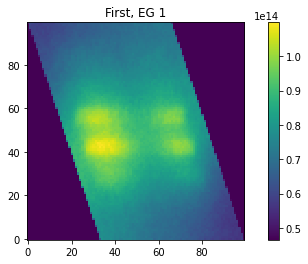

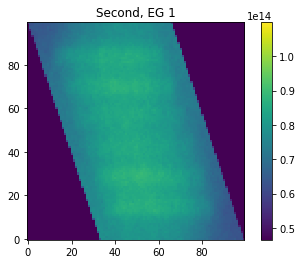

In [26]:
plot_flux(1, flux_vals_minimized_pf_cleared, flux_vals_minimized_ppf_cleared, 
          flux_vals_minimized_pf, flux_vals_minimized_ppf)